## Multiseries forecast

In [2]:
import pandas as pd
import glob
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
glob.glob('../../../data/mail_cup/*.csv')

['../../../data/mail_cup/train.csv',
 '../../../data/mail_cup/sample_submission.csv',
 '../../../data/mail_cup/test.csv']

In [46]:
train = pd.read_csv('../../../data/mail_cup/train.csv', sep=';')

In [12]:
train.head(5).T

,0,1,2,3,4
region,72,75,74,73,65
oktmo,71000000000,76000000000,75000000000,73000000000,64000000000
okato,71000000000,76000000000,75000000000,73000000000,64000000000
date,31.03.2021,31.03.2021,31.03.2021,31.03.2021,31.03.2021
pasta,"86,36","83,48","75,59","73,77","132,15"
...,...,...,...,...,...
dt,"50,18","53,58","48,41","46,93","59,31"
ai92_value,"738 049,00","350 912,44","1 001 103,38","400 342,50","262 623,69"
ai95_value,"438 485,91","144 884,38","559 145,81","161 002,06","157 463,67"
ai98_value,"3 182,57","7 341,17","23,55","6 391,44","27 128,07"


In [13]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60193 entries, 0 to 60192
Data columns (total 79 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   region                    60193 non-null  int64 
 1   oktmo                     60193 non-null  int64 
 2   okato                     60193 non-null  int64 
 3   date                      60193 non-null  object
 4   pasta                     60193 non-null  object
 5   legumes                   60193 non-null  object
 6   bread                     60193 non-null  object
 7   flour                     60193 non-null  object
 8   rice                      60193 non-null  object
 9   groats                    60193 non-null  object
 10  potatoes                  60193 non-null  object
 11  сucumbers_tomatoes        60193 non-null  object
 12  vegetables                60193 non-null  object
 13  roots                     60193 non-null  object
 14  сabbage               

## Convert to correct data types

In [47]:
train['date'].unique()

array(['31.03.2021', '30.03.2021', '29.03.2021', '28.03.2021',
       '27.03.2021', '26.03.2021', '25.03.2021', '24.03.2021',
       '23.03.2021', '22.03.2021', '21.03.2021', '20.03.2021',
       '19.03.2021', '18.03.2021', '17.03.2021', '16.03.2021',
       '15.03.2021', '14.03.2021', '13.03.2021', '12.03.2021',
       '11.03.2021', '10.03.2021', '09.03.2021', '08.03.2021',
       '07.03.2021', '06.03.2021', '05.03.2021', '04.03.2021',
       '03.03.2021', '02.03.2021', '01.03.2021', '28.02.2021',
       '27.02.2021', '26.02.2021', '25.02.2021', '24.02.2021',
       '23.02.2021', '22.02.2021', '21.02.2021', '20.02.2021',
       '19.02.2021', '18.02.2021', '17.02.2021', '16.02.2021',
       '15.02.2021', '14.02.2021', '13.02.2021', '12.02.2021',
       '11.02.2021', '10.02.2021', '09.02.2021', '08.02.2021',
       '07.02.2021', '06.02.2021', '05.02.2021', '04.02.2021',
       '03.02.2021', '02.02.2021', '01.02.2021', '31.01.2021',
       '30.01.2021', '29.01.2021', '28.01.2021', '27.01

In [48]:
train['date'] = pd.to_datetime(train['date'], format='%d.%m.%Y')

In [61]:
display(train['date'].min())
display(train['date'].max())

Timestamp('2019-04-23 00:00:00')

Timestamp('2021-03-31 00:00:00')

In [60]:
forecast_col = [col for col in train.columns if train[col].dtype == 'object']

In [54]:
%%time
for col in forecast_col:
    train[col] = pd.to_numeric(train[col].str.replace('\xa0', '').str.replace(' ', '').str.replace(',','.'))

CPU times: user 6.52 s, sys: 384 ms, total: 6.9 s
Wall time: 6.9 s


In [55]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60193 entries, 0 to 60192
Data columns (total 79 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   region                    60193 non-null  int64         
 1   oktmo                     60193 non-null  int64         
 2   okato                     60193 non-null  int64         
 3   date                      60193 non-null  datetime64[ns]
 4   pasta                     60193 non-null  float64       
 5   legumes                   60193 non-null  float64       
 6   bread                     60193 non-null  float64       
 7   flour                     60193 non-null  float64       
 8   rice                      60193 non-null  float64       
 9   groats                    60193 non-null  float64       
 10  potatoes                  60193 non-null  float64       
 11  сucumbers_tomatoes        60193 non-null  float64       
 12  vegetables        

## Regions

In [41]:
display(train['region'].nunique())
display(train['oktmo'].nunique())
display(train['okato'].nunique())

84

85

85

In [79]:
reg = train[['region', 'oktmo', 'okato']].drop_duplicates()
reg[reg.duplicated(subset='region', keep=False)]

,region,oktmo,okato
47,21,97000000000,97000000000
48,21,1000000000,1000000000


In [82]:
reg[reg['region'] == 28]

,region,oktmo,okato
72,28,10000000000,10000000000


In [83]:
reg[reg['oktmo'] == 1000000000]

,region,oktmo,okato
48,21,1000000000,1000000000


In [62]:
train['date'].nunique()

709

In [67]:
train.shape

(60193, 79)

In [64]:
60193 / 709

84.8984485190409

In [58]:
train.head()

,region,oktmo,okato,date,pasta,legumes,bread,flour,rice,groats,...,spice_value,tea_value,ai92,ai95,ai98,dt,ai92_value,ai95_value,ai98_value,dt_value
0,72,71000000000,71000000000,2021-03-31,86.36,108.63,75.10,34.06,81.14,65.37,...,40875.05,44193.60,43.40,48.18,54.85,50.18,738049.00,438485.91,3182.57,66982.78
1,75,76000000000,76000000000,2021-03-31,83.48,123.53,73.87,42.34,65.98,50.66,...,21705.41,26263.81,49.09,50.63,53.71,53.58,350912.44,144884.38,7341.17,36931.85
2,74,75000000000,75000000000,2021-03-31,75.59,103.61,81.43,33.27,77.01,70.49,...,75719.70,86481.15,42.12,45.94,49.85,48.41,1001103.38,559145.81,23.55,163207.48
3,73,73000000000,73000000000,2021-03-31,73.77,87.81,76.34,32.33,72.69,69.96,...,27386.71,25340.40,43.41,47.01,47.94,46.93,400342.50,161002.06,6391.44,66398.72
4,65,64000000000,64000000000,2021-03-31,132.15,123.60,109.73,50.71,24.65,20.25,...,14260.44,10247.91,51.71,51.23,58.18,59.31,262623.69,157463.67,27128.07,10191.43


In [65]:
train.columns

Index(['region', 'oktmo', 'okato', 'date', 'pasta', 'legumes', 'bread',
       'flour', 'rice', 'groats', 'potatoes', 'сucumbers_tomatoes',
       'vegetables', 'roots', 'сabbage', 'fruit', 'sugar', 'candy', 'biscuits',
       'mutton', 'beef', 'chicken', 'pork', 'fish', 'herring', 'curd',
       'sour_creame', 'butter', 'milk_kefir', 'cheese', 'egg', 'margarine',
       'oil', 'salt', 'spice', 'tea', 'cpi_1', 'cpi_2', 'cpi_3', 'pasta_value',
       'legumes_value', 'bread_value', 'flour_value', 'rice_value',
       'groats_value', 'potatoes_value', 'сucumbers_tomatoes_value',
       'vegetables_value', 'roots_value', 'сabbage_value', 'fruit_value',
       'sugar_value', 'candy_value', 'biscuits_value', 'mutton_value',
       'beef_value', 'chicken_value', 'pork_value', 'fish_value',
       'herring_value', 'curd_value', 'sour_creame_value', 'butter_value',
       'milk_kefir_value', 'cheese_value', 'egg_value', 'margarine_value',
       'oil_value', 'salt_value', 'spice_value', 'tea_v

## Look on a sereis

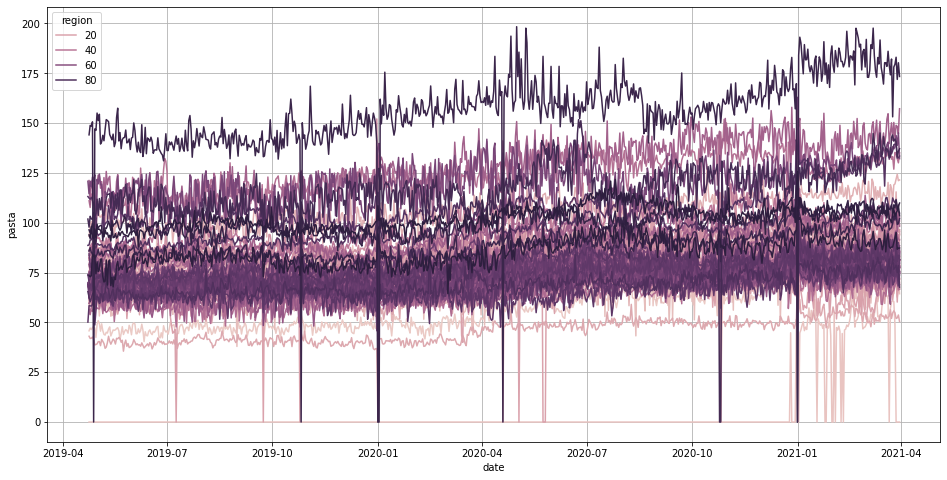

In [66]:
plt.figure(figsize=(16,8))
sns.lineplot(x='date', y='pasta', hue='region', data=train)
plt.grid()

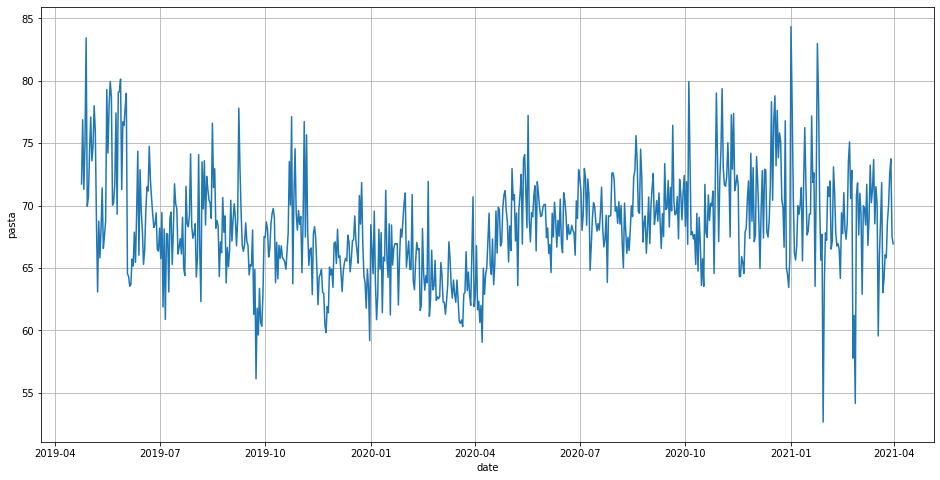

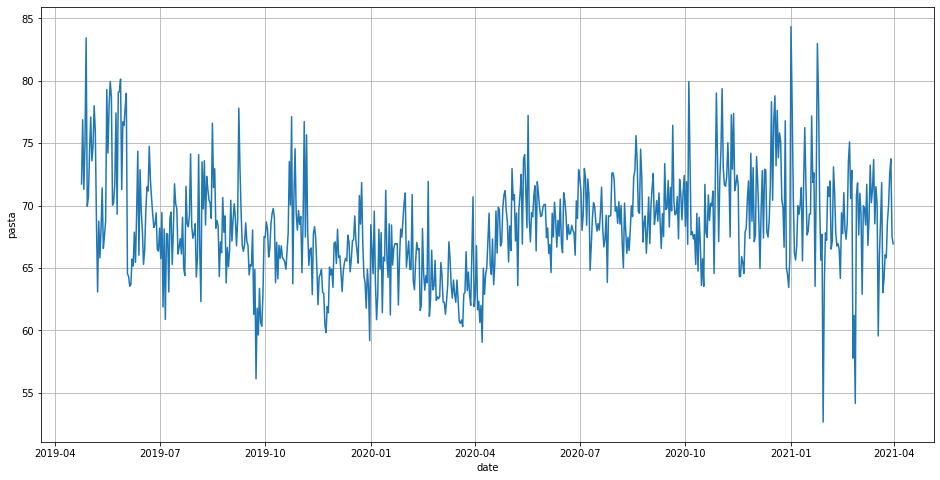

In [87]:
plt.figure(figsize=(16,8))
sns.lineplot(x='date', y='pasta', data=train[train['oktmo'] == 1000000000])
plt.grid()

plt.figure(figsize=(16,8))
sns.lineplot(x='date', y='pasta', data=train[train['oktmo'] == 97000000000])
plt.grid()

In [88]:
train.shape

(60193, 79)

In [89]:
train.replace(1000000000, 97000000000).drop_duplicates().shape

(59485, 79)

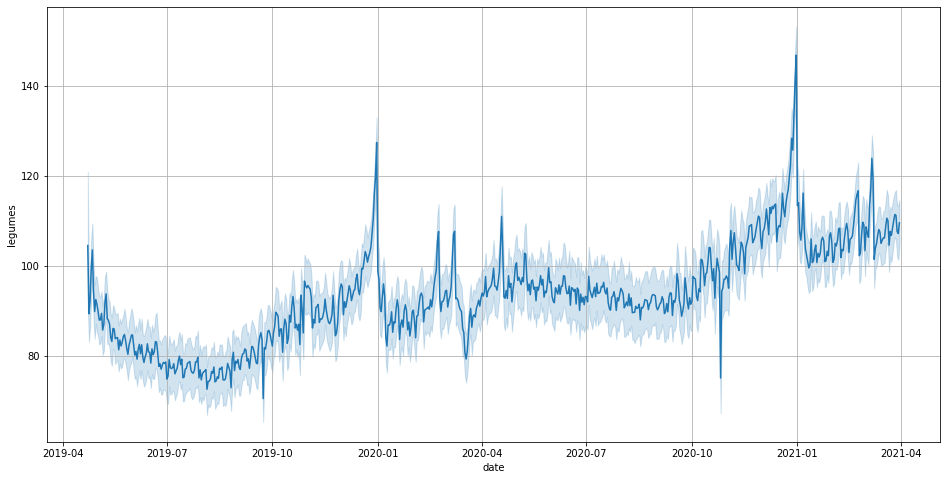

In [57]:
plt.figure(figsize=(16,8))
sns.lineplot(x='date', y='legumes', data=train)
plt.grid()

In [69]:
train.head()

,region,oktmo,okato,date,pasta,legumes,bread,flour,rice,groats,...,spice_value,tea_value,ai92,ai95,ai98,dt,ai92_value,ai95_value,ai98_value,dt_value
0,72,71000000000,71000000000,2021-03-31,86.36,108.63,75.10,34.06,81.14,65.37,...,40875.05,44193.60,43.40,48.18,54.85,50.18,738049.00,438485.91,3182.57,66982.78
1,75,76000000000,76000000000,2021-03-31,83.48,123.53,73.87,42.34,65.98,50.66,...,21705.41,26263.81,49.09,50.63,53.71,53.58,350912.44,144884.38,7341.17,36931.85
2,74,75000000000,75000000000,2021-03-31,75.59,103.61,81.43,33.27,77.01,70.49,...,75719.70,86481.15,42.12,45.94,49.85,48.41,1001103.38,559145.81,23.55,163207.48
3,73,73000000000,73000000000,2021-03-31,73.77,87.81,76.34,32.33,72.69,69.96,...,27386.71,25340.40,43.41,47.01,47.94,46.93,400342.50,161002.06,6391.44,66398.72
4,65,64000000000,64000000000,2021-03-31,132.15,123.60,109.73,50.71,24.65,20.25,...,14260.44,10247.91,51.71,51.23,58.18,59.31,262623.69,157463.67,27128.07,10191.43


In [98]:
from tsfresh.utilities.dataframe_functions import roll_time_series
from tsfresh import extract_features

In [96]:
%%time
df_rolled = roll_time_series(train[['oktmo', 'date', 'pasta', 'legumes']], 
                             column_id="oktmo", column_sort="date")

Rolling: 100%|██████████| 30/30 [00:42<00:00,  1.43s/it]


CPU times: user 23.7 s, sys: 4.42 s, total: 28.1 s
Wall time: 55.7 s


In [100]:
%%time
df_features = extract_features(df_rolled, column_id="oktmo", column_sort="date")

Feature Extraction:   0%|          | 0/29 [00:00<?, ?it/s]Process ForkPoolWorker-12:
Process ForkPoolWorker-11:
Process ForkPoolWorker-8:
Process ForkPoolWorker-7:
Process ForkPoolWorker-10:
Process ForkPoolWorker-9:
Traceback (most recent call last):
Traceback (most recent call last):
Traceback (most recent call last):
  File "/home/mrmopoz/anaconda3/lib/python3.6/multiprocessing/process.py", line 258, in _bootstrap
    self.run()
  File "/home/mrmopoz/anaconda3/lib/python3.6/multiprocessing/process.py", line 258, in _bootstrap
    self.run()
  File "/home/mrmopoz/anaconda3/lib/python3.6/multiprocessing/process.py", line 258, in _bootstrap
    self.run()
  File "/home/mrmopoz/anaconda3/lib/python3.6/multiprocessing/process.py", line 93, in run
    self._target(*self._args, **self._kwargs)
  File "/home/mrmopoz/anaconda3/lib/python3.6/multiprocessing/process.py", line 93, in run
    self._target(*self._args, **self._kwargs)
  File "/home/mrmopoz/anaconda3/lib/python3.6/multiprocessing/

KeyboardInterrupt: 

  File "/home/mrmopoz/anaconda3/lib/python3.6/multiprocessing/pool.py", line 119, in worker
    result = (True, func(*args, **kwds))
  File "/home/mrmopoz/anaconda3/lib/python3.6/multiprocessing/pool.py", line 119, in worker
    result = (True, func(*args, **kwds))
  File "/home/mrmopoz/anaconda3/lib/python3.6/site-packages/tsfresh/utilities/distribution.py", line 43, in _function_with_partly_reduce
    results = list(itertools.chain.from_iterable(results))
  File "/home/mrmopoz/anaconda3/lib/python3.6/site-packages/tsfresh/utilities/distribution.py", line 43, in _function_with_partly_reduce
    results = list(itertools.chain.from_iterable(results))


## Submission

In [92]:
sub = pd.read_csv('../../../data/mail_cup/sample_submission.csv')

In [93]:
sub

,region,oktmo,okato,date,pasta,legumes,bread,flour,rice,groats,...,spice_value,tea_value,ai92,ai95,ai98,dt,ai92_value,ai95_value,ai98_value,dt_value
0,65,64000000000,64000000000,30.06.2021,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,66,65000000000,65000000000,30.06.2021,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,64,63000000000,63000000000,30.06.2021,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,67,66000000000,66000000000,30.06.2021,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,70,69000000000,69000000000,30.06.2021,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7730,43,33000000000,33000000000,01.04.2021,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7731,73,73000000000,73000000000,01.04.2021,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7732,74,75000000000,75000000000,01.04.2021,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7733,72,71000000000,71000000000,01.04.2021,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [94]:
display(sub['region'].nunique())
display(sub['oktmo'].nunique())
display(sub['okato'].nunique())

84

85

85